# CZEA Fellowships Statistics

## Spring 2023 Fellowships Evaluation

The last run of our EA fellowships was by far the most successful in terms of number of applications (77) and participants (54) (see Figure 1). We hit the record also in number of people who attended 6 or more sessions in a seminar (31). We think the cause of the success is better marketing.

But we could improve in completion rate (the percentage of people who get from the apllication to attending 6 or more sessions in a seminar), which was 40% - better than the previous run, but significantly worse than in our first fellowship runs (see Figure 2). One factor causing lower completion rate could be that  the cohorts often are not strictly determined and small - people feel less responsibility toward their cohort.

<Axes: title={'center': 'Figure 1: Applications, participants, completions by seasons'}>

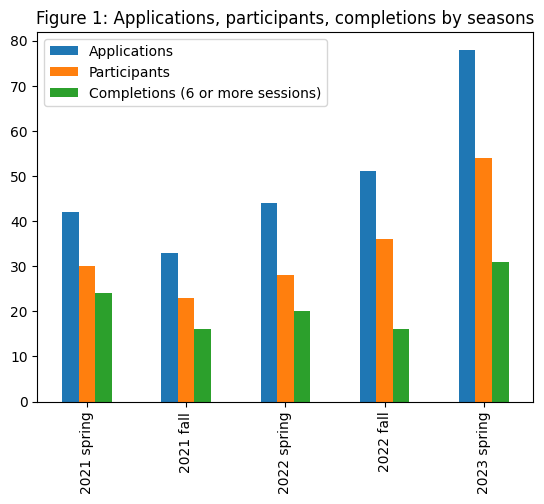

In [2]:
report_df[["Applications", "Participants", "Completions (6 or more sessions)"]].drop("2023 fall").plot.bar(title="Figure 1: Applications, participants, completions by seasons")

<Axes: title={'center': 'Figure 2: Completion rate by seasons'}>

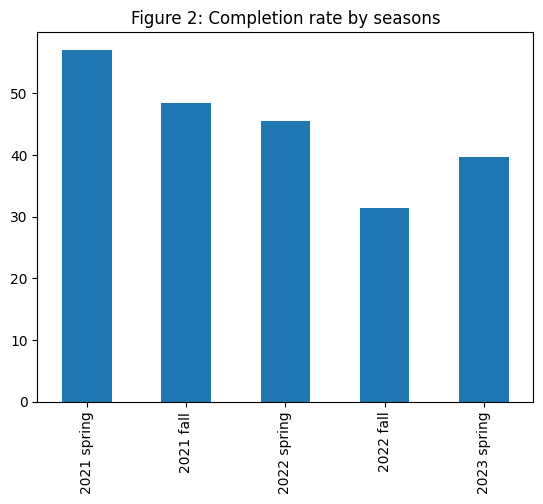

In [3]:
report_df["Completions rate"].drop("2023 fall").plot.bar(title="Figure 2: Completion rate by seasons")

In [4]:
report_df

,Applications,Participants,Completions (6 or more sessions),Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
2021 spring,42,30,24,199,4.9,28.6,57.1,1,5.0,10.0,9.0
2021 fall,33,23,16,133,4.6,30.3,48.5,10,7.1,9.5,9.7
2022 spring,44,28,20,167,3.8,36.4,45.5,12,6.7,9.4,9.2
2022 fall,51,36,16,183,3.8,29.4,31.4,6,6.5,8.3,7.7
2023 spring,78,54,31,273,3.5,30.8,39.7,26,7.1,9.0,9.2
2023 fall,23,,,,,,,,,,


In [86]:
report_2_columns("Season","Seminar")

,AI safety seminář,Prague Season seminář,seminář Kariéra s pozitivním dopadem,úvodní Seminář o efektivním altruismu
2021 jaro,0,0,0,42 / 100.0%
2021 podzim,0,0,0,33 / 100.0%
2022 jaro,0,0,0,44 / 100.0%
2022 podzim,22 / 33.3%,22 / 33.3%,0,22 / 33.3%
2023 jaro,43 / 49.4%,0,12 / 13.8%,32 / 36.8%
2023 podzim,13 / 52.0%,0,4 / 16.0%,8 / 32.0%


In [87]:
report_2_columns("Season","AI seminar")

,AI Governance Curriculum,Technical Alignment Curriculum
2021 jaro,0,0
2021 podzim,0,0
2022 jaro,0,0
2022 podzim,6 / 27.3%,16 / 72.7%
2023 jaro,16 / 38.1%,26 / 61.9%
2023 podzim,5 / 38.5%,8 / 61.5%


In [88]:
report_2_columns("Season","Facilitator")

,Ada Böhm,Anna Gajdová,Hana Kalivodová,Jakub Halmeš,Jakub Sechter,Jan Votava,Jiří Nádvorník,Martin Račák,Matej Vrzala,Michal Keda,Pavel Minárik,Přemek Paška,Tomáš Dulka,Tomáš Turlík,Vojtěch Brynych
2021 jaro,0,4 / 9.5%,0,0,0,14 / 33.3%,10 / 23.8%,3 / 7.1%,3 / 7.1%,0,0,4 / 9.5%,0,0,4 / 9.5%
2021 podzim,0,0,4 / 14.8%,0,3 / 11.1%,0,3 / 11.1%,5 / 18.5%,0,5 / 18.5%,0,4 / 14.8%,3 / 11.1%,0,0
2022 jaro,0,0,0,0,0,12 / 36.4%,5 / 15.2%,0,0,3 / 9.1%,4 / 12.1%,0,0,4 / 12.1%,5 / 15.2%
2022 podzim,8 / 21.6%,0,4 / 10.8%,0,0,6 / 16.2%,0,0,0,5 / 13.5%,0,4 / 10.8%,3 / 8.1%,0,7 / 18.9%
2023 jaro,4 / 5.4%,0,14 / 18.9%,6 / 8.1%,11 / 14.9%,29 / 39.2%,0,0,0,4 / 5.4%,0,6 / 8.1%,0,0,0
2023 podzim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
report_2_columns("Season","City")

,Beroun,Bratislava,Brno,Děčín,Lucemburk,Olomouc,Plzeň,Považská Bystrica,Praha,v Praze
2021 jaro,1 / 2.9%,0,3 / 8.8%,1 / 2.9%,0,0,1 / 2.9%,0,28 / 82.4%,0
2021 podzim,0,1 / 3.6%,7 / 25.0%,3 / 10.7%,0,1 / 3.6%,0,1 / 3.6%,15 / 53.6%,0
2022 jaro,0,0,11 / 28.2%,0,0,3 / 7.7%,0,1 / 2.6%,23 / 59.0%,1 / 2.6%
2022 podzim,0,0,11 / 23.9%,0,0,0,1 / 2.2%,0,34 / 73.9%,0
2023 jaro,1 / 1.3%,0,17 / 22.7%,0,1 / 1.3%,0,1 / 1.3%,0,54 / 72.0%,1 / 1.3%
2023 podzim,0,1 / 4.2%,9 / 37.5%,0,0,1 / 4.2%,0,0,13 / 54.2%,0


In [90]:
report_2_columns("Season","Format")

,"""preferuji osobní setkávání",ale online je také fajn,"ale online je také fajn""",preferuji online/nemám možnost účastnit se osobně,preferuji osobní setkávání,silně preferuji osobní setkávání
2021 jaro,0,0,0,0,0,0
2021 podzim,0,16 / 33.3%,0,14 / 29.2%,17 / 35.4%,1 / 2.1%
2022 jaro,0,26 / 34.7%,0,13 / 17.3%,31 / 41.3%,5 / 6.7%
2022 podzim,0,22 / 31.4%,0,10 / 14.3%,30 / 42.9%,8 / 11.4%
2023 jaro,1 / 0.8%,41 / 30.8%,1 / 0.8%,23 / 17.3%,54 / 40.6%,13 / 9.8%
2023 podzim,1 / 2.3%,12 / 27.9%,1 / 2.3%,5 / 11.6%,18 / 41.9%,6 / 14.0%


In [91]:
report_2_columns("Season","Age")

,15 - 20 let,20 - 24 let,25 - 29 let,30 - 35 let,víc než 35 let
2021 jaro,2 / 4.8%,13 / 31.0%,16 / 38.1%,8 / 19.0%,3 / 7.1%
2021 podzim,1 / 3.0%,9 / 27.3%,10 / 30.3%,7 / 21.2%,6 / 18.2%
2022 jaro,2 / 4.5%,17 / 38.6%,7 / 15.9%,9 / 20.5%,9 / 20.5%
2022 podzim,1 / 2.0%,15 / 30.6%,9 / 18.4%,14 / 28.6%,10 / 20.4%
2023 jaro,2 / 2.6%,9 / 11.7%,20 / 26.0%,25 / 32.5%,21 / 27.3%
2023 podzim,3 / 13.6%,5 / 22.7%,4 / 18.2%,4 / 18.2%,6 / 27.3%


In [92]:
report_2_columns("Season","Gender")

,F,M
2021 jaro,23 / 54.8%,19 / 45.2%
2021 podzim,17 / 51.5%,16 / 48.5%
2022 jaro,26 / 59.1%,18 / 40.9%
2022 podzim,17 / 33.3%,34 / 66.7%
2023 jaro,32 / 41.6%,45 / 58.4%
2023 podzim,4 / 17.4%,19 / 82.6%


In [93]:
df.loc[df["Jak jste se o semináři dozvěděli?"].str.contains("FB, i když český EA zde nesleduji", na=False), "Jak jste se o semináři dozvěděli?"] = "FB i když český EA zde nesleduji"
report_2_columns("Season","Jak jste se o semináři dozvěděli?")

,FB i když český EA zde nesleduji,jinak,leták,osobní doporučení,přednáška,sleduji vás na FB,spolkový newsletter,web Spolku pro efektivní altruismus
2021 jaro,0,0,0,0,0,0,0,0
2021 podzim,0,0,0,0,0,0,0,0
2022 jaro,13 / 32.5%,0,3 / 7.5%,15 / 37.5%,0,8 / 20.0%,0,1 / 2.5%
2022 podzim,1 / 2.1%,6 / 12.8%,1 / 2.1%,24 / 51.1%,0,10 / 21.3%,0,5 / 10.6%
2023 jaro,13 / 17.6%,7 / 9.5%,1 / 1.4%,15 / 20.3%,3 / 4.1%,23 / 31.1%,4 / 5.4%,8 / 10.8%
2023 podzim,0,2 / 10.0%,0,8 / 40.0%,2 / 10.0%,1 / 5.0%,1 / 5.0%,6 / 30.0%


## All seasons statistics (2021 - 2023)

### All Seasons, basic statistics

,Applications,Participants,Completions (6 or more sessions),Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
All seasons,270,171,107,955,4.0,30.8,43.3,54,6.9,9.1,9.1


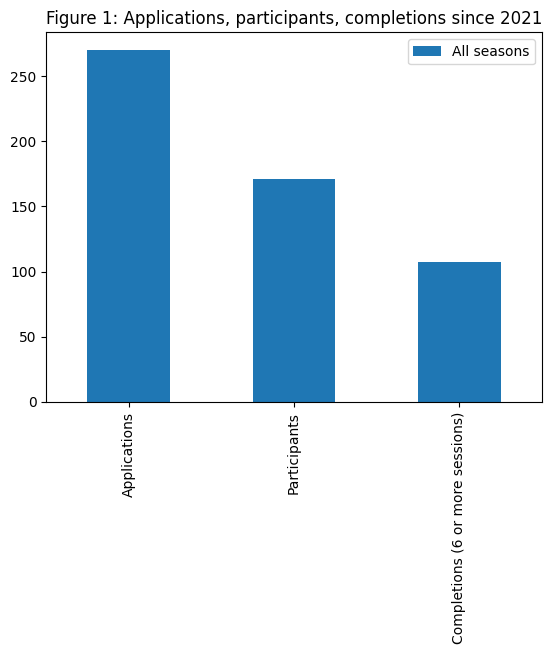

In [94]:
report_df = report(df,"All seasons")
report_df = report_df.rename(columns={"Completions":"Completions (6 or more sessions)"})
report_df[["Applications", "Participants", "Completions (6 or more sessions)"]].transpose().plot.bar(title="Figure 1: Applications, participants, completions since 2021")
report_df

### All Seasons, detailed statistics

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
AI safety seminář,78,47,29,242,3.8,27.7,44.6,17,6.8,8.6,8.8
Prague Season seminář,22,13,3,53,2.6,40.9,13.6,2,7.5,9.5,8.5
seminář Kariéra s pozitivním dopadem,16,9,4,44,3.7,25.0,33.3,2,8.0,10.0,10.0
úvodní Seminář o efektivním altruismu,181,120,77,688,4.1,30.6,44.5,36,6.9,9.2,9.2


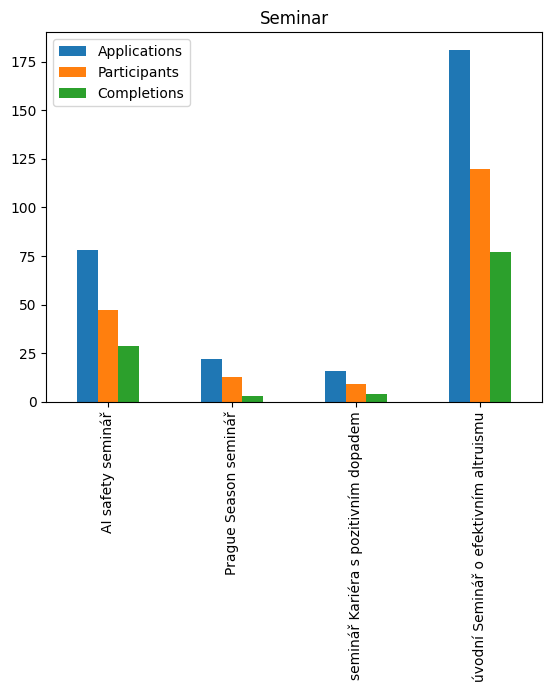

In [95]:
column_final_report("Seminar")

In [96]:
df['Willingness to recommend'].dtype

dtype('O')

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
AI Governance Curriculum,27,13,6,54,2.5,40.9,27.3,5,6.6,9.0,8.6
Technical Alignment Curriculum,50,33,22,181,4.4,21.4,52.4,13,6.8,8.5,8.8


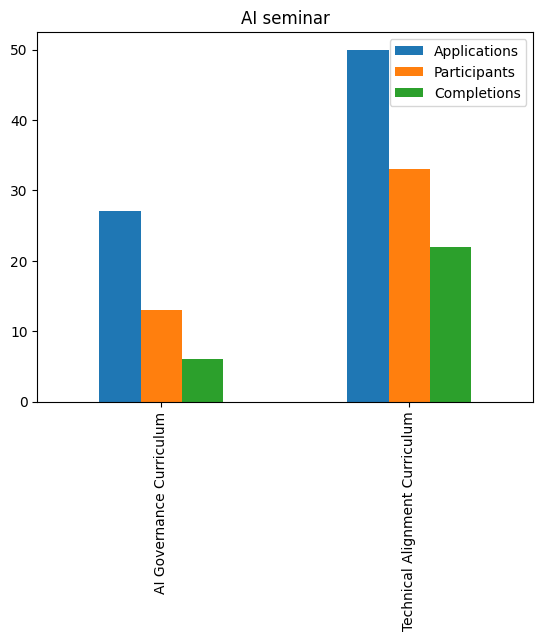

In [97]:
column_final_report("AI seminar")

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
Ada Böhm,12,11,5,51,4.6,8.3,41.7,3,6.0,6.3,8.3
Anna Gajdová,4,3,3,23,5.8,25.0,75.0,0,,,
Hana Kalivodová,22,18,10,86,3.9,18.2,45.5,5,6.6,9.2,8.8
Jakub Halmeš,6,6,4,30,5.0,0.0,66.7,5,7.4,9.4,9.8
Jakub Sechter,14,10,6,56,4.0,28.6,42.9,2,8.0,9.0,10.0
Jan Votava,61,53,31,282,4.6,13.1,50.8,22,7.1,9.4,9.4
Jiří Nádvorník,18,17,14,116,6.4,5.6,77.8,5,6.0,9.6,9.6
Martin Račák,8,7,4,31,3.9,12.5,50.0,1,8.0,10.0,10.0
Matej Vrzala,3,2,2,16,5.3,33.3,66.7,0,,,
Michal Keda,17,16,8,86,5.1,5.9,47.1,6,6.3,8.0,8.8


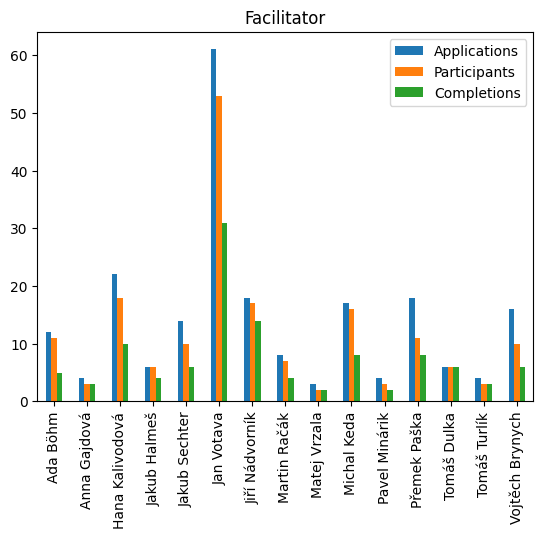

In [98]:
column_final_report("Facilitator")

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
Beroun,2,1,1,6,3.0,50.0,50.0,0,,,
Bratislava,2,1,1,7,7.0,0.0,100.0,1,9.0,9.0,10.0
Brno,58,39,23,208,4.3,20.4,46.9,17,6.7,8.7,8.9
Děčín,4,4,4,32,8.0,0.0,100.0,1,8.0,10.0,10.0
Lucemburk,1,1,0,3,3.0,0.0,0.0,0,,,
Olomouc,5,2,0,6,1.5,50.0,0.0,0,,,
Plzeň,3,3,2,18,6.0,0.0,66.7,1,8.0,10.0,10.0
Považská Bystrica,2,2,2,13,6.5,0.0,100.0,0,,,
Praha,167,102,65,573,3.9,33.8,42.2,29,6.8,9.1,9.1
v Praze,2,1,0,2,1.0,50.0,0.0,0,,,


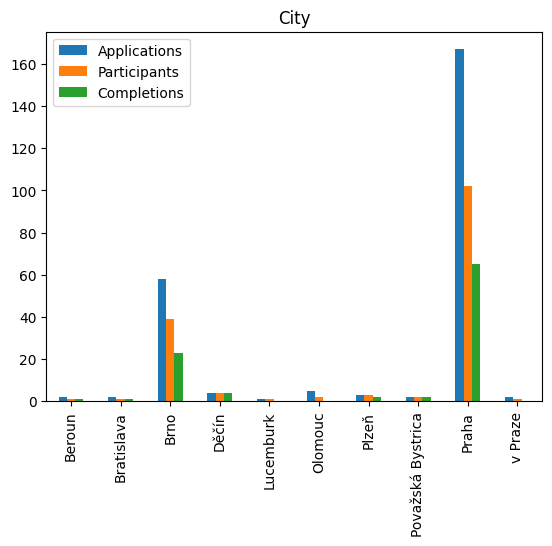

In [99]:
column_final_report("City")

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
in person,150,95,57,512,4.0,28.0,43.2,36,6.7,8.8,9.0
online,65,37,23,201,3.5,38.3,38.3,15,7.3,9.6,9.5


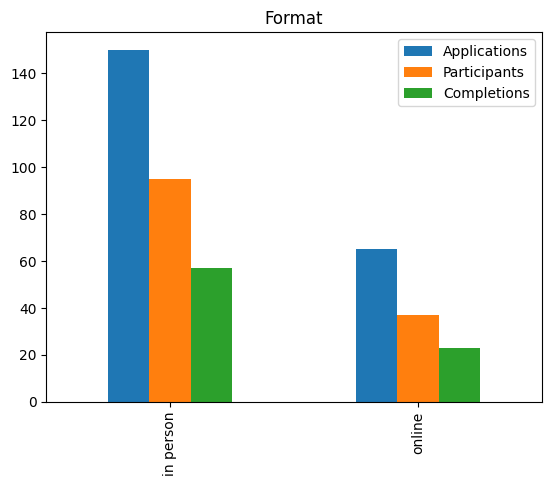

In [100]:

df.loc[df["Format"].str.contains("preferuji os", na=False), "Format"] = "in person"
df.loc[df["Format"].str.contains("preferuji on", na=False), "Format"] = "online"
column_final_report("Format")

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
15 - 20 let,11,8,6,49,6.1,0.0,75.0,1,3.0,7.0,9.0
20 - 24 let,68,40,23,215,3.5,36.5,36.5,10,6.5,9.1,8.7
25 - 29 let,66,46,34,286,4.8,25.8,54.8,12,6.8,8.7,9.2
30 - 35 let,67,44,23,225,3.7,30.2,36.5,15,7.5,9.7,9.1
víc než 35 let,55,32,21,176,3.7,34.7,42.9,16,6.9,9.0,9.4


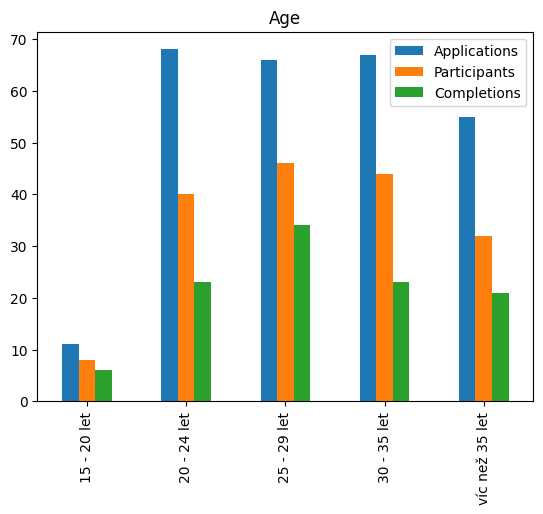

In [101]:
column_final_report("Age")

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
F,119,70,44,391,3.4,39.1,38.3,20,6.8,9.2,9.4
M,151,101,63,564,4.5,23.5,47.7,34,7.0,9.0,9.0


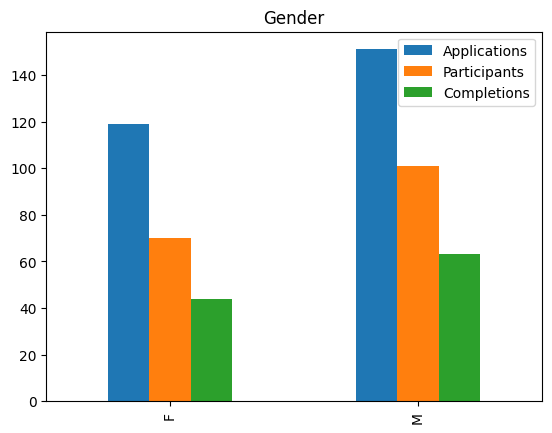

In [102]:
column_final_report("Gender")

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
FB i když český EA zde nesleduji,27,11,6,60,2.2,59.3,22.2,5,8.6,9.4,9.6
jinak,15,11,4,45,3.5,15.4,30.8,3,4.7,9.0,7.0
leták,5,4,2,17,3.4,20.0,40.0,1,7.0,9.0,8.0
osobní doporučení,62,43,24,235,4.4,20.4,44.4,14,7.6,9.0,9.3
přednáška,5,3,2,18,6.0,0.0,66.7,1,8.0,8.0,10.0
sleduji vás na FB,42,29,19,154,3.8,29.3,46.3,12,6.2,8.8,8.7
spolkový newsletter,5,3,2,17,4.2,25.0,50.0,1,9.0,10.0,10.0
web Spolku pro efektivní altruismus,20,9,5,49,4.1,35.7,35.7,3,7.0,9.3,9.0


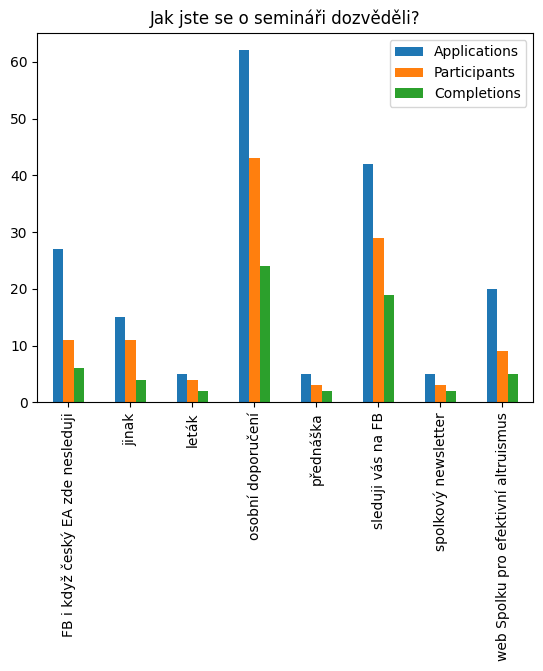

In [103]:
df.loc[df["Jak jste se o semináři dozvěděli?"].str.contains("FB, i když český EA zde nesleduji", na=False), "Jak jste se o semináři dozvěděli?"] = "FB i když český EA zde nesleduji"
column_final_report("Jak jste se o semináři dozvěděli?")

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
AI Researcher,13,13,8,62,4.8,0.0,61.5,6,7.3,8.0,8.8
Podnikavec,12,12,9,76,6.3,0.0,75.0,5,8.2,9.4,9.8
Policnik,12,10,7,58,4.8,16.7,58.3,3,8.3,9.7,9.7
Vědec,4,3,3,23,5.8,25.0,75.0,1,9.0,9.0,9.0


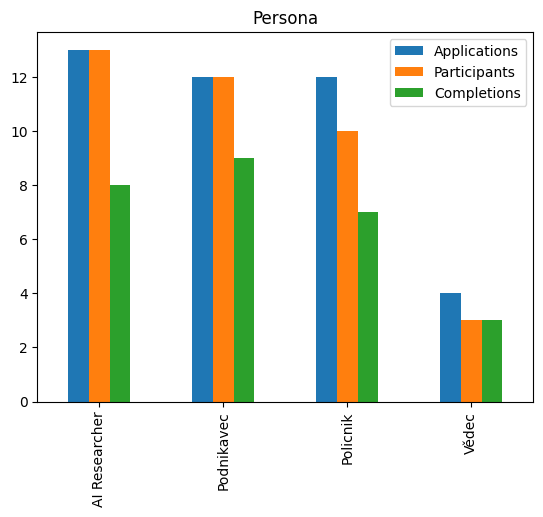

In [104]:
column_final_report("Persona")

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate,Survey,Influence on decisions,Willingness to recommend,Facilitator evaluation
AI Safety,10,10,7,56,5.6,0.0,70.0,6,7.3,8.0,9.0
Biorisks,3,2,2,14,4.7,33.3,66.7,1,8.0,9.0,10.0
Environment,2,2,1,11,5.5,0.0,50.0,0,,,


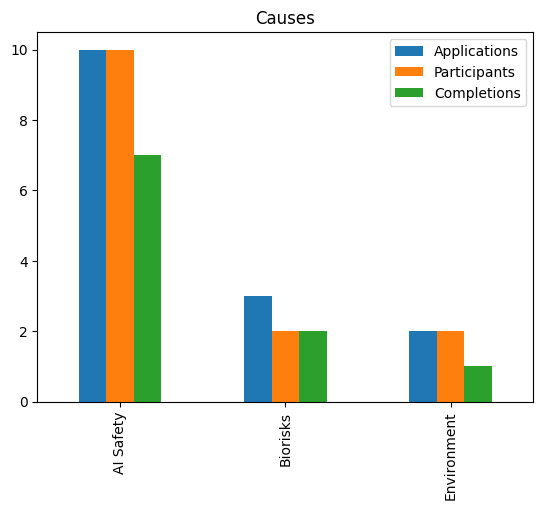

In [105]:
column_final_report("Causes")

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def get_data(data_file, columns_file):
    input_path = os.path.join(os.getcwd(), "datasets")
    columns = pd.read_csv(os.path.join(input_path, columns_file), sep="\t", header=None)
    columns = columns[0].str.partition(" (from ")[0].tolist()
    columns.insert(0, "Name")
    return pd.read_csv(os.path.join(input_path, data_file), sep="\t", names=columns)

data_file = "Untitled spreadsheet - Sheet1.tsv"
columns_file = "Untitled spreadsheet - Sheet2.tsv"
df = get_data(data_file, columns_file)

def report(df, index, df0=df):
    report_df = pd.DataFrame(index=[index])
    report_df['Applications'] = len(df)
    report_df['Participants'] = len(df[df['Participation'] > 0])
    report_df['Completions'] = len(df[df['Participation'] > 5])
    report_df['Total attendance'] = int(df['Participation'].sum())

    seasons_list = sorted(df0.Season.unique())
    past_seasons_filter = df.Season != seasons_list[-1]
    past_seasons_df = df[past_seasons_filter]
    participation_filter = past_seasons_df['Participation'] > 0
    completion_filter = past_seasons_df['Participation'] > 5

    questions = ['Influence on decisions', 'Willingness to recommend', 'Facilitator evaluation']

    if len(past_seasons_df[participation_filter]) > 0:
        report_df['Mean attendance'] = df['Participation'].mean().round(1)
        report_df['Dropout'] = (len(past_seasons_df) - len(past_seasons_df[participation_filter])) / len(past_seasons_df) * 100
        report_df['Completions rate'] = len(past_seasons_df[completion_filter]) / len(past_seasons_df) * 100
        report_df['Dropout'] = report_df.Dropout.round(1)
        report_df['Completions rate'] = report_df['Completions rate'].round(1)

        survey = len(df[df[questions[0]].notna()])
        report_df['Survey'] = survey
        for question in questions:
            if survey > 0:
                if df[question].dtype == 'object':
                    df = df.copy()
                    df.loc[:, question] = df[question].astype(str)
                    df.loc[df[question].str.contains("10 - určitě ano", na=False), question] = 10
                    df.loc[:,question] = pd.to_numeric(df[question], errors='coerce')
                report_df[question] = df[question].mean().round(1)
            else:  
                report_df[question] = ""

    else:
        report_df[['Dropout','Mean attendance','Completions rate','Participants','Completions','Total attendance', 'Survey', 'Influence on decisions', 'Willingness to recommend', 'Facilitator evaluation']] = ""

    return report_df

def items_list(series):
    split_series = series.str.split(', ')
    items_list = split_series.explode().value_counts().reset_index()
    items_list.columns = ['Item', 'Count']
    items_list = items_list[items_list.Count > 1]
    items_list = items_list.Item.sort_values()
    return items_list

def report_column(column, df):
    reports = []
    items = items_list(df[column])
    for i in items:
        filter = df[column].str.contains(i, na=False)
        reports.append(report(df[filter], i))

    report_df = pd.concat(reports)
    return report_df

def column_final_report(column, df=df):
    report_df = report_column(column, df)
    report_df[["Applications", "Participants", "Completions"]].plot.bar(title=column)
    return report_df

def percentage(x,row_sum):
    if x == 0 or str(x) == "NaN":
        return 0 
    else:
        return f'{x} / {((x/row_sum)*100).round(1)}%'

def report_2_columns(column1, column2, df=df):
    
    items_list1 = items_list(df[column1])
    items_list2 = items_list(df[column2])

    reports = []
    for i in items_list1:
        df1 = df[df[column1].str.contains(i, na=False)]
        report_df = pd.DataFrame(index=[i])
        for j in items_list2:
            report_df[j] = len(df1[df1[column2].str.contains(j, na=False)])
        row_sum = report_df.loc[i].sum()
        report_df.loc[i] = report_df.loc[i].apply(lambda x: percentage(x,row_sum))
        reports.append(report_df)

    report_df = pd.concat(reports)
    return report_df

report_df = report_column("Season", df)

report_df.index = report_df.index.str.replace("jaro", "spring").str.replace("podzim", "fall")
report_df = report_df.rename(columns={"Completions":"Completions (6 or more sessions)"})